# Unit 5 - Financial Planning

In [5]:
# Initial imports
import os
import requests
import pandas as pd
from dotenv import load_dotenv
import alpaca_trade_api as tradeapi
from MCForecastTools import MCSimulation

%matplotlib inline

In [6]:
# Load .env enviroment variables
load_dotenv()

True

## Part 1 - Personal Finance Planner

### Collect Crypto Prices Using the `requests` Library

In [7]:
# Set current amount of crypto assets
my_btc = 1.2
my_eth = 5.3

In [8]:
# Crypto API URLs
btc_url = "https://api.alternative.me/v2/ticker/Bitcoin/?convert=CAD"
eth_url = "https://api.alternative.me/v2/ticker/Ethereum/?convert=CAD"

In [9]:
btc_url = btc_url + "?format=json"
eth_url = eth_url + "?format=json"

In [10]:
print(btc_url)

https://api.alternative.me/v2/ticker/Bitcoin/?convert=CAD?format=json


In [11]:
import json

In [12]:
btc_data = requests.get(btc_url)
eth_data = requests.get(eth_url)

In [13]:
btc_json = btc_data.json()
eth_json = eth_data.json()

In [14]:
print(json.dumps(btc_json, indent=4))

{
    "data": {
        "1": {
            "id": 1,
            "name": "Bitcoin",
            "symbol": "BTC",
            "website_slug": "bitcoin",
            "rank": 1,
            "circulating_supply": 18828556,
            "total_supply": 18828556,
            "max_supply": 21000000,
            "quotes": {
                "USD": {
                    "price": 41845.0,
                    "volume_24h": 30987956107,
                    "market_cap": 787070239925,
                    "percentage_change_1h": -0.610660347839164,
                    "percentage_change_24h": -4.84588301156078,
                    "percentage_change_7d": -2.53297375204856,
                    "percent_change_1h": -0.610660347839164,
                    "percent_change_24h": -4.84588301156078,
                    "percent_change_7d": -2.53297375204856
                }
            },
            "last_updated": 1632826132
        }
    },
    "metadata": {
        "timestamp": 1632826132,
        "num_c

In [15]:
# Fetch current BTC price
btc_price = btc_json["data"]["1"]["quotes"]["USD"]["price"]

# Fetch current ETH price
eth_price = eth_json["data"]["1027"]["quotes"]["USD"]["price"]

# Compute current value of my crpto
my_btc_value = my_btc * btc_price
my_eth_value = my_eth * eth_price

# Print current crypto wallet balance
print(f"The current value of your {my_btc} BTC is ${my_btc_value:0.2f}")
print(f"The current value of your {my_eth} ETH is ${my_eth_value:0.2f}")

The current value of your 1.2 BTC is $50214.00
The current value of your 5.3 ETH is $15405.67


### Collect Investments Data Using Alpaca: `SPY` (stocks) and `AGG` (bonds)

In [16]:
# Set current amount of shares
my_agg = 200
my_spy = 50

In [17]:
# Set Alpaca API key and secret
alpaca_api_key = os.getenv("ALPACA_API_KEY")
alpaca_secret_key = os.getenv("ALPACA_SECRET_KEY")

# Create the Alpaca API object
alpaca = tradeapi.REST(
    alpaca_api_key,
    alpaca_secret_key,
    api_version="v2"
)

In [18]:
type(alpaca)

alpaca_trade_api.rest.REST

In [19]:
# Format current date as ISO format
today = pd.Timestamp.now(tz="America/Phoenix").round(freq='D').isoformat()

# Set the tickers
tickers = ["AGG", "SPY"]

# Set timeframe to '1D' for Alpaca API
timeframe = "1D"

# Get current closing prices for SPY and AGG
# (use a limit=1000 parameter to call the most recent 1000 days of data)
df_portfolio = alpaca.get_barset(
    tickers,
    timeframe,
    start = pd.Timestamp("2021-09-23", tz="America/Phoenix").isoformat(),
    end = pd.Timestamp("2021-09-23", tz="America/Phoenix").isoformat(),
    limit = 1000
).df

# Preview DataFrame
df_portfolio.head()

AGG                                      SPY  \
                             open    high     low   close   volume    open   
time                                                                         
2021-09-23 00:00:00-04:00  115.93  115.94  115.57  115.57  7516613  439.84   

                                                            
                             high    low   close    volume  
time                                                        
2021-09-23 00:00:00-04:00  444.89  439.6  443.13  67408294

In [20]:
df_portfolio

AGG                                      SPY  \
                             open    high     low   close   volume    open   
time                                                                         
2021-09-23 00:00:00-04:00  115.93  115.94  115.57  115.57  7516613  439.84   

                                                            
                             high    low   close    volume  
time                                                        
2021-09-23 00:00:00-04:00  444.89  439.6  443.13  67408294

In [21]:
df_portfolio_agg = df_portfolio["AGG"]["close"][0]
df_portfolio_agg.dtype
df_portfolio_spy = df_portfolio["SPY"]["close"][0]
df_portfolio_spy

443.13

In [22]:
df_portfolio.shape

(1, 10)

In [23]:
# Pick AGG and SPY close prices
df_closing_prices = pd.DataFrame()

df_closing_prices["AGG"] = df_portfolio["AGG"]["close"]
df_closing_prices["SPY"] = df_portfolio["SPY"]["close"]
agg_close = float(df_portfolio["AGG"]["close"])
spy_close = float(df_portfolio["SPY"]["close"])
spy_close_series = df_portfolio["SPY"]["close"]
#Sandeep -- help understanding why when this is cast as float it returns a value

# Print AGG and SPY close prices
print(f"Current AGG closing price: ${agg_close}")
print(f"Current SPY closing price: ${spy_close}")
spy_close_series

Current AGG closing price: $115.57
Current SPY closing price: $443.13


time
2021-09-23 00:00:00-04:00    443.13
Name: close, dtype: float64

In [24]:
# Compute the current value of shares
my_spy_value = my_spy * spy_close
my_agg_value = my_agg * agg_close

# Print current value of shares
print(f"The current value of your {my_spy} SPY shares is ${my_spy_value:0.2f}")
print(f"The current value of your {my_agg} AGG shares is ${my_agg_value:0.2f}")

The current value of your 50 SPY shares is $22156.50
The current value of your 200 AGG shares is $23114.00


### Savings Health Analysis

In [25]:
# Set monthly household income
monthly_income = 12000

# Consolidate financial assets data
crypto = (my_btc_value + my_eth_value)
shares = (my_spy_value + my_agg_value)
holdings = [crypto, shares]

# Create savings DataFrame
df_savings = pd.DataFrame(holdings, columns = ['amount'], index=["crypto", "shares"])
#df_savings.rename(columns={'0': 'amount'}, inplace=True)

# Display savings DataFrame
display(df_savings)
#display(holdings)

,amount
crypto,65619.669
shares,45270.500


In [26]:
df_savings.shape

(2, 1)

<AxesSubplot:ylabel='amount'>

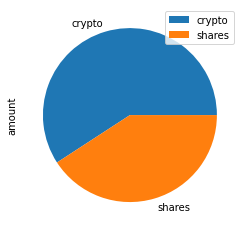

In [27]:
# Plot savings pie chart
df_savings.plot.pie(y='amount')

In [38]:
# Set ideal emergency fund
emergency_fund = monthly_income * 6

# Calculate total amount of savings
total_savings = (my_agg_value + my_spy_value + crypto)
#print(emergency_fund)
#print(total_savings)
# Validate saving health
if total_savings > emergency_fund:
    print("Congratulations! You've built up an adequate savings to handle financial emergencies!")
elif total_savings == emergency_fund:
    print("Your emergency savings goal has been met.")
else:  
    print("Your first priority should be to set aside at least six months worth of income in an emergency fund.")


Congratulations! You've built up an adequate savings to handle financial emergencies!


## Part 2 - Retirement Planning

### Monte Carlo Simulation

In [39]:
# Set start and end dates of five years back from today.
# Sample results may vary from the solution based on the time frame chosen
start_date = pd.Timestamp('2016-05-01', tz='America/New_York').isoformat()
end_date = pd.Timestamp('2021-05-01', tz='America/New_York').isoformat()

In [42]:
# Get 5 years' worth of historical data for SPY and AGG
# (use a limit=1000 parameter to call the most recent 1000 days of data)
df_stock_data = alpaca.get_barset(
    tickers,
    timeframe,
    start = start_date,
    end = end_date,
    limit = 1000
).df

# Display sample data
df_stock_data.head()

AGG                                         \
                             open     high       low    close     volume   
time                                                                       
2017-05-10 00:00:00-04:00  108.60  108.660  108.4400  108.520  1427511.0   
2017-05-11 00:00:00-04:00  108.35  108.540  108.3435  108.515  1773499.0   
2017-05-12 00:00:00-04:00  108.81  108.940  108.7800  108.920  1136553.0   
2017-05-15 00:00:00-04:00  108.85  108.940  108.8200  108.890  1620264.0   
2017-05-16 00:00:00-04:00  108.88  109.101  108.8800  109.000  1394153.0   

                              SPY                                       
                             open    high     low    close      volume  
time                                                                    
2017-05-10 00:00:00-04:00     NaN     NaN     NaN      NaN         NaN  
2017-05-11 00:00:00-04:00  239.35  239.57  238.13  239.410  45435690.0  
2017-05-12 00:00:00-04:00  239.09  239.21  238.67  239.030  35283567.0  
2017-05-15 00:00:00-04:00  239.47  240.44  239.45  240.245  42230620.0  
2017-05-16 00:00:00-04:00  240.62  240.67  239.63  240.100  37206183.0

In [44]:
# Configuring a Monte Carlo simulation to forecast 30 years cumulative returns
MC_mkt_port = MCSimulation(
    portfolio_data = df_stock_data,
    weights = [.4,.6],
    num_simulation = 500,
    num_trading_days = 252*30
)

In [47]:
# Printing the simulation input data
MC_mkt_port.portfolio_data.tail()

AGG                                       \
                             open      high     low   close     volume   
time                                                                     
2021-04-26 00:00:00-04:00  114.74  114.8015  114.65  114.65  2867784.0   
2021-04-27 00:00:00-04:00  115.13  115.1300  114.37  114.37  3421667.0   
2021-04-28 00:00:00-04:00  114.45  114.4685  114.20  114.44  6185936.0   
2021-04-29 00:00:00-04:00  114.14  114.3700  114.09  114.37  5796983.0   
2021-04-30 00:00:00-04:00  114.41  114.5150  114.33  114.50  5160765.0   

                                           SPY                            \
                          daily_return    open    high       low   close   
time                                                                       
2021-04-26 00:00:00-04:00    -0.000871  417.44  418.22  416.8111  417.64   
2021-04-27 00:00:00-04:00    -0.002442  417.91  418.14  416.3000  417.48   
2021-04-28 00:00:00-04:00     0.000612  417.81  419.01  416.9000  417.35   
2021-04-29 00:00:00-04:00    -0.000612  420.33  420.72  416.4400  419.99   
2021-04-30 00:00:00-04:00     0.001137  417.63  418.54  416.3400  417.30   

                                                    
                               volume daily_return  
time                                                
2021-04-26 00:00:00-04:00  44689009.0     0.002208  
2021-04-27 00:00:00-04:00  45962264.0    -0.000383  
2021-04-28 00:00:00-04:00  45533863.0    -0.000311  
2021-04-29 00:00:00-04:00  70607144.0     0.006326  
2021-04-30 00:00:00-04:00  73129109.0    -0.006405

In [48]:
# Running a Monte Carlo simulation to forecast 30 years cumulative returns
MC_mkt_port.calc_cumulative_return()

Running Monte Carlo simulation number 0.
Running Monte Carlo simulation number 10.
Running Monte Carlo simulation number 20.
Running Monte Carlo simulation number 30.
Running Monte Carlo simulation number 40.
Running Monte Carlo simulation number 50.
Running Monte Carlo simulation number 60.
Running Monte Carlo simulation number 70.
Running Monte Carlo simulation number 80.
Running Monte Carlo simulation number 90.
Running Monte Carlo simulation number 100.
Running Monte Carlo simulation number 110.
Running Monte Carlo simulation number 120.
Running Monte Carlo simulation number 130.
Running Monte Carlo simulation number 140.
Running Monte Carlo simulation number 150.
Running Monte Carlo simulation number 160.
Running Monte Carlo simulation number 170.
Running Monte Carlo simulation number 180.
Running Monte Carlo simulation number 190.
Running Monte Carlo simulation number 200.
Running Monte Carlo simulation number 210.
Running Monte Carlo simulation number 220.
Running Monte Carlo si

,0,1,2,3,4,5,6,7,8,9,...,490,491,492,493,494,495,496,497,498,499
0,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,...,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000
1,0.994294,1.004285,1.007772,0.990395,1.003242,1.007808,0.994203,1.002325,1.003181,1.001180,...,1.003021,1.009427,1.015811,0.997050,0.999429,0.984404,0.991591,0.992304,1.006632,1.001238
2,0.999069,1.021525,0.979810,0.994523,1.001265,1.006026,0.992039,0.996179,0.995630,0.992886,...,1.011293,1.005250,1.030051,0.992766,0.994692,0.977633,0.993016,0.988606,1.008148,1.002498
3,0.995377,1.010417,0.972857,1.003025,0.997972,1.010179,0.984245,1.007623,0.993081,0.990299,...,1.014212,1.018654,1.021008,0.992620,0.974434,0.975688,1.001233,0.988698,1.002778,1.004858
4,0.998928,1.009996,0.963867,1.020577,1.002518,1.024428,0.974383,1.000377,1.002881,0.993812,...,1.013945,1.009196,1.037178,0.990849,0.969332,0.976602,0.992216,0.994160,0.994794,1.004876
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
7556,19.543315,38.093572,6.954925,17.327798,21.487420,14.888618,19.656530,55.282101,27.001025,10.794344,...,11.519996,22.185988,14.345226,17.041206,31.644339,11.746724,18.480037,63.657772,10.702960,19.545724
7557,19.199655,38.478252,7.010706,17.323141,21.718323,14.923330,19.782081,55.876986,27.179660,10.980677,...,11.503857,22.074829,14.411970,16.843264,31.610035,11.791440,18.670537,64.300989,10.772109,19.663354
7558,18.976861,37.991825,6.955717,17.280379,21.692853,15.077576,19.451852,55.249994,26.871808,10.890562,...,11.501314,22.181481,14.693144,16.940088,31.906696,11.699296,18.448294,65.126923,10.893700,19.858006
7559,19.219671,37.720851,7.007312,17.455671,21.311293,14.984244,19.232771,56.063406,27.030381,10.939033,...,11.665583,22.344426,14.359609,16.870040,32.343947,11.685575,18.502293,64.848532,10.891818,19.843657


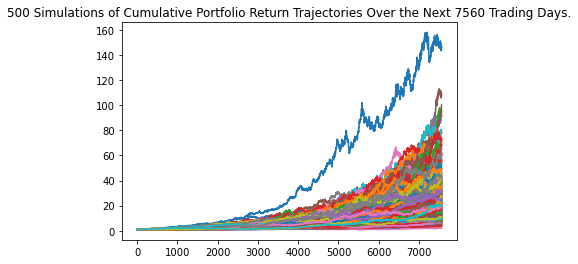

In [49]:
# Plot simulation outcomes
mkt_port_line_plot = MC_mkt_port.plot_simulation()

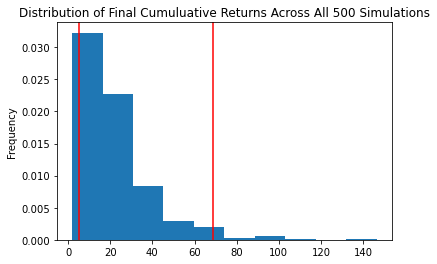

In [50]:
# Plot probability distribution and confidence intervals
mkt_port_dist_plot = MC_mkt_port.plot_distribution()

### Retirement Analysis

In [52]:
# Fetch summary statistics from the Monte Carlo simulation results
mkt_port_stats_tbl = MC_mkt_port.summarize_cumulative_return()

# Print summary statistics
print(mkt_port_stats_tbl)

count           500.000000
mean             22.233479
std              17.317433
min               1.919228
25%              11.071082
50%              17.119025
75%              26.990655
max             146.361302
95% CI Lower      5.289075
95% CI Upper     68.762320
Name: 7560, dtype: float64


### Calculate the expected portfolio return at the `95%` lower and upper confidence intervals based on a `$20,000` initial investment.

In [53]:
mkt_port_stats_tbl[8]

5.289074513595805

In [54]:
mkt_port_stats_tbl[9]

68.76231983956362

In [56]:
# Set initial investment
initial_investment = 20000

# Use the lower and upper `95%` confidence intervals to calculate the range of the possible outcomes of our $20,000
mkt_port_lower_proj = round(mkt_port_stats_tbl[8]*initial_investment,2)
mkt_port_upper_proj = round(mkt_port_stats_tbl[9]*initial_investment,2)

# Print results
print(f"There is a 95% chance that an initial investment of ${initial_investment} in the portfolio"
      f" over the next 30 years will end within in the range of"
      f" ${mkt_port_lower_proj} and ${mkt_port_upper_proj}")

There is a 95% chance that an initial investment of $20000 in the portfolio over the next 30 years will end within in the range of $105781.49 and $1375246.4


### Calculate the expected portfolio return at the `95%` lower and upper confidence intervals based on a `50%` increase in the initial investment.

In [60]:
# Set initial investment
initial_investment_halfagain = round(20000 * 1.5,2)

# Use the lower and upper `95%` confidence intervals to calculate the range of the possible outcomes of our $30,000
mkt_port_half_again_lower_proj = round(mkt_port_stats_tbl[8]*initial_investment_halfagain,2)
mkt_port_half_again_upper_proj = round(mkt_port_stats_tbl[9]*initial_investment_halfagain,2)

# Print results
print(f"There is a 95% chance that an initial investment of ${initial_investment_halfagain} in the portfolio"
      f" over the next 30 years will end within in the range of"
      f" ${mkt_port_half_again_lower_proj} and ${mkt_port_half_again_upper_proj}")

There is a 95% chance that an initial investment of $30000.0 in the portfolio over the next 30 years will end within in the range of $158672.24 and $2062869.6


## Optional Challenge - Early Retirement


### Five Years Retirement Option

In [61]:
# Configuring a Monte Carlo simulation to forecast 5 years cumulative returns
MC_eighty_twenty = MCSimulation(
    portfolio_data = df_stock_data,
    weights = [.2, .8],
    num_simulation = 500,
    num_trading_days = 252*5
)

In [62]:
# Running a Monte Carlo simulation to forecast 5 years cumulative returns
MC_eighty_twenty.calc_cumulative_return()

Running Monte Carlo simulation number 0.
Running Monte Carlo simulation number 10.
Running Monte Carlo simulation number 20.
Running Monte Carlo simulation number 30.
Running Monte Carlo simulation number 40.
Running Monte Carlo simulation number 50.
Running Monte Carlo simulation number 60.
Running Monte Carlo simulation number 70.
Running Monte Carlo simulation number 80.
Running Monte Carlo simulation number 90.
Running Monte Carlo simulation number 100.
Running Monte Carlo simulation number 110.
Running Monte Carlo simulation number 120.
Running Monte Carlo simulation number 130.
Running Monte Carlo simulation number 140.
Running Monte Carlo simulation number 150.
Running Monte Carlo simulation number 160.
Running Monte Carlo simulation number 170.
Running Monte Carlo simulation number 180.
Running Monte Carlo simulation number 190.
Running Monte Carlo simulation number 200.
Running Monte Carlo simulation number 210.
Running Monte Carlo simulation number 220.
Running Monte Carlo si

,0,1,2,3,4,5,6,7,8,9,...,490,491,492,493,494,495,496,497,498,499
0,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,...,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000
1,0.998032,1.004226,0.997692,0.991199,0.981396,0.992903,1.010632,1.031390,0.981765,1.014312,...,1.009935,1.016481,1.005793,1.005167,1.026234,1.038502,1.001444,0.998728,1.019010,1.001442
2,1.002106,0.978876,1.009688,0.991484,0.987444,1.011318,1.005790,1.052813,0.989304,1.028118,...,1.007144,1.017739,0.992629,1.010417,1.033074,1.037277,1.004411,0.999131,1.037163,1.002230
3,0.990717,0.990461,1.018078,0.977429,0.975837,1.012413,1.007585,1.059335,0.996113,1.016547,...,0.996862,1.031682,0.997771,0.997033,1.036159,1.051171,1.001464,1.011686,1.026397,1.011151
4,0.990025,0.993025,1.010168,0.963020,0.992202,1.029955,0.991312,1.038038,1.002869,1.023556,...,1.000577,1.030293,0.995270,1.019365,1.031570,1.055112,1.011225,1.003170,1.029624,1.023670
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
1256,1.332192,1.828261,1.683093,1.725411,1.244571,2.586099,1.307254,1.305167,2.743224,2.406221,...,2.079819,2.413404,1.978284,3.548223,1.660592,1.954771,1.045802,1.982744,1.624240,3.009506
1257,1.341273,1.803019,1.678968,1.733284,1.237348,2.559808,1.310047,1.312585,2.715958,2.453730,...,2.095787,2.433902,1.981940,3.606400,1.657107,1.944218,1.074499,1.935490,1.634177,3.062413
1258,1.337127,1.804136,1.695901,1.754036,1.239969,2.541689,1.299554,1.306400,2.686861,2.417983,...,2.102125,2.409717,1.976143,3.560315,1.627613,1.946680,1.072924,1.985269,1.645487,3.097935
1259,1.339661,1.779834,1.719498,1.749635,1.213572,2.556400,1.324140,1.317936,2.679651,2.431114,...,2.092878,2.436431,2.025031,3.512808,1.655047,1.953271,1.068185,1.970742,1.654950,3.093669


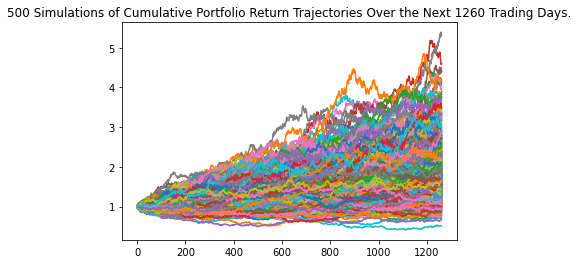

In [64]:
# Plot simulation outcomes
MC_eighty_twenty_line_plot = MC_eighty_twenty.plot_simulation()

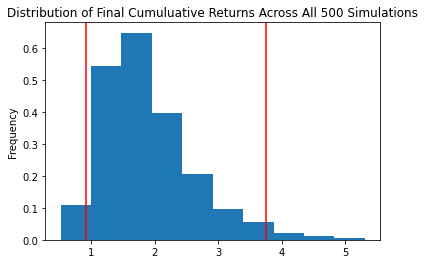

In [65]:
# Plot probability distribution and confidence intervals
MC_dist_plot = MC_eighty_twenty.plot_distribution()

In [67]:
# Fetch summary statistics from the Monte Carlo simulation results
MC_eighty_twenty_stats_tbl = MC_eighty_twenty.summarize_cumulative_return()

# Print summary statistics
print(MC_eighty_twenty_stats_tbl)

count           500.000000
mean              1.896433
std               0.723339
min               0.518750
25%               1.373565
50%               1.744934
75%               2.257209
max               5.305202
95% CI Lower      0.915527
95% CI Upper      3.751993
Name: 1260, dtype: float64


In [68]:
MC_eighty_twenty_stats_tbl[8]

0.9155274521143928

In [69]:
# Set initial investment
eighty_twenty_initial_investment = 60000

# Use the lower and upper `95%` confidence intervals to calculate the range of the possible outcomes of our $60,000
eighty_twenty_lower_proj = round(MC_eighty_twenty_stats_tbl[8]*eighty_twenty_initial_investment,2)
eighty_twenty_upper_proj = round(MC_eighty_twenty_stats_tbl[9]*eighty_twenty_initial_investment,2)

# Print results
print(f"There is a 95% chance that an initial investment of ${eighty_twenty_initial_investment} in the portfolio"
      f" over the next 5 years will end within in the range of"
      f" ${eighty_twenty_lower_proj} and ${eighty_twenty_upper_proj}")

There is a 95% chance that an initial investment of $60000 in the portfolio over the next 5 years will end within in the range of $54931.65 and $225119.56


### Ten Years Retirement Option

In [70]:
# Configuring a Monte Carlo simulation to forecast 10 years cumulative returns
MC_seventy_thirty = MCSimulation(
    portfolio_data = df_stock_data,
    weights = [.3, .7],
    num_simulation = 500,
    num_trading_days = 252*10
)

In [71]:
# Running a Monte Carlo simulation to forecast 10 years cumulative returns
MC_seventy_thirty.calc_cumulative_return()

Running Monte Carlo simulation number 0.
Running Monte Carlo simulation number 10.
Running Monte Carlo simulation number 20.
Running Monte Carlo simulation number 30.
Running Monte Carlo simulation number 40.
Running Monte Carlo simulation number 50.
Running Monte Carlo simulation number 60.
Running Monte Carlo simulation number 70.
Running Monte Carlo simulation number 80.
Running Monte Carlo simulation number 90.
Running Monte Carlo simulation number 100.
Running Monte Carlo simulation number 110.
Running Monte Carlo simulation number 120.
Running Monte Carlo simulation number 130.
Running Monte Carlo simulation number 140.
Running Monte Carlo simulation number 150.
Running Monte Carlo simulation number 160.
Running Monte Carlo simulation number 170.
Running Monte Carlo simulation number 180.
Running Monte Carlo simulation number 190.
Running Monte Carlo simulation number 200.
Running Monte Carlo simulation number 210.
Running Monte Carlo simulation number 220.
Running Monte Carlo si

,0,1,2,3,4,5,6,7,8,9,...,490,491,492,493,494,495,496,497,498,499
0,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,...,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000
1,1.001206,1.012020,1.001473,1.009239,1.014862,1.006484,0.994982,1.001145,1.019598,1.001825,...,1.015814,1.001179,1.008597,1.023473,0.996859,1.001587,1.000492,0.994751,0.999597,0.998338
2,0.988907,1.000522,1.009731,1.020777,1.010699,1.012900,1.017787,1.006529,1.003059,1.001421,...,1.010460,0.999897,1.007392,1.026917,1.005727,1.006333,1.006504,0.997160,0.994464,1.005565
3,0.982466,0.997101,1.016010,1.004949,1.015072,0.998105,1.040075,1.000992,0.992433,1.010452,...,0.997213,0.990687,0.992618,1.023856,0.999495,0.988667,1.012667,0.984947,1.003158,1.008525
4,0.975442,0.987789,1.019378,1.020242,1.039706,0.984610,1.045283,1.015475,0.986302,1.008566,...,0.996948,0.980438,1.004435,1.015933,1.006650,0.984457,1.009123,0.980525,0.996196,1.017480
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
2516,2.889749,4.246992,3.919068,2.119610,3.548280,3.672441,5.612427,2.815424,1.846549,6.106475,...,2.523932,2.649074,4.853092,4.059249,5.365425,1.625224,6.772934,5.976714,4.806041,3.835868
2517,2.864592,4.230809,3.924820,2.128405,3.500990,3.694543,5.602747,2.801640,1.843601,6.185267,...,2.510594,2.638777,4.845176,4.078884,5.336815,1.617123,6.779852,6.063093,4.793892,3.779704
2518,2.860010,4.254684,3.992982,2.133723,3.513976,3.651489,5.595821,2.820046,1.852811,6.179580,...,2.488388,2.652277,4.851931,4.097567,5.322964,1.612078,6.810026,6.069082,4.841356,3.755878
2519,2.829592,4.361651,4.011491,2.134391,3.439872,3.622050,5.597790,2.835955,1.860975,6.153443,...,2.492144,2.682951,4.933993,4.156945,5.302778,1.599955,6.822777,6.123199,4.906472,3.761320


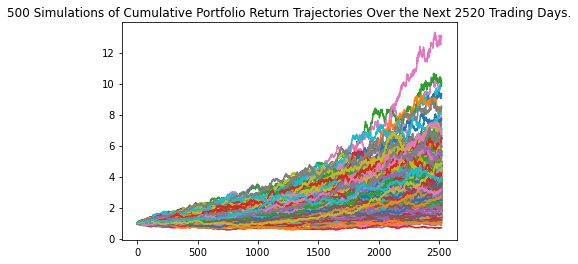

In [75]:
# Plot simulation outcomes
MC_seventy_thirty_line_plot = MC_seventy_thirty.plot_simulation()

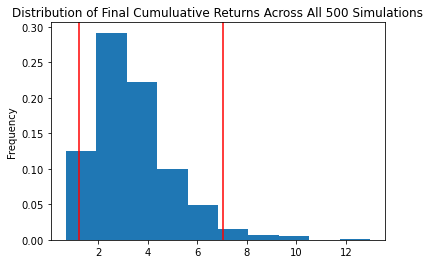

In [74]:
# Plot probability distribution and confidence intervals
MC_seventy_dist_plot = MC_seventy_thirty.plot_distribution()

In [34]:
# Fetch summary statistics from the Monte Carlo simulation results
# YOUR CODE HERE!

# Print summary statistics
# YOUR CODE HERE!

count           500.000000
mean              1.537014
std               0.282192
min               0.795263
25%               1.339641
50%               1.523799
75%               1.693927
max               2.451787
95% CI Lower      1.049781
95% CI Upper      2.159935
Name: 2520, dtype: float64


In [35]:
# Set initial investment
# YOUR CODE HERE!

# Use the lower and upper `95%` confidence intervals to calculate the range of the possible outcomes of our $60,000
# YOUR CODE HERE!

# Print results
print(f"There is a 95% chance that an initial investment of ${initial_investment} in the portfolio"
      f" over the next 10 years will end within in the range of"
      f" ${ci_lower_ten} and ${ci_upper_ten}")

There is a 95% chance that an initial investment of $60000 in the portfolio over the next 10 years will end within in the range of $62986.85 and $129596.12
